# Comparativa entre KNN, Desicion Trees y Esemble Learning

## Introdución

Para la presentacion de la practica 3 y 4 del curso de Inteligencia Artificial a cargo del Ing. Paul Cardenas realizamos lo siguiente:
Usando una base de datos de vinos, entre estos datos estan contenidos propiedades quimicas del vino, ademas de caracteristicas de calidad (3-9 mas es mejor) y por último el color del vino (rojo y blanco). El nombre del archivo es 'Wine_Quality_Data.csv'.

## Carga de la Data


In [1]:
from google.colab import drive
drive.mount('/content/drive_all')


datafile='/content/drive_all/My Drive/PYTHON/PC3-4/Team/file.xls'









Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive_all


In [0]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
data_path = ['/content/drive_all/My Drive/PYTHON/PC3-4/vinos/']
filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

## Revisión de las Caractericas (Features) de la Data

* Examinamos la data.

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


* Vemos el tipo de variable que acompaña a cada caracteristica.

In [36]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

* Cambiamos el formato de los datos en la columna de 'color' para asi poder usarlos.

In [0]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)

# Desicion Trees como Clasificador
 
* Nuestro Obejtivo es clasificar si el vino es rojo o blanco en base al resto de caracteristicas de la data.



## Separación de la Data

* Usando `StratifiedShuffleSplit` para separar la data en una entrenamiento y en una de prueba.

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

Data_split = StratifiedShuffleSplit(n_splits=1, test_size=2000, random_state=42)

train_idx, test_idx = next(Data_split.split(data[feature_cols], data['color']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

* Verificando que se separo bien la data.

In [8]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3487,7.2,0.24,0.40,17.85,0.049,50.0,185.0,1.00000,3.34,0.42,9.6,5
5562,6.0,0.34,0.32,3.80,0.044,13.0,116.0,0.99108,3.39,0.44,11.8,7
1324,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
2157,5.9,0.21,0.24,12.10,0.044,53.0,165.0,0.99690,3.25,0.39,9.5,5
3260,6.7,0.26,0.49,8.30,0.047,54.0,191.0,0.99540,3.23,0.40,10.3,6


## Generando el modelo de Desicion Trees

* Ajustando el modelo con la parte de entrenamiento que separamos anteriormente, no usaremos profundidad máxima, cantidad de nodos ni cantidad de caracteristicas.

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

* Número de nodos y máxima produndidad.

In [41]:
dt.tree_.node_count, dt.tree_.max_depth

(141, 18)

* Función para medir el error.

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def errorfunc(y, y_pred, label):
    return pd.Series({'exactitud':accuracy_score(y, y_pred),
                      'precisión': precision_score(y, y_pred),
                      'recall': recall_score(y, y_pred),
                      'f1': f1_score(y, y_pred)},
                      name=label)

* Calculando el Error.

In [43]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

full_error = pd.concat([errorfunc(y_train, y_train_pred, 'train'),
                              errorfunc(y_test, y_test_pred, 'test')],
                              axis=1)

full_error

,train,test
exactitud,0.999778,0.990000
f1,0.999549,0.979716
precisión,0.999097,0.977733
recall,1.000000,0.981707




## Curva de Aprendizaje

* Para ver como cambia el valor de la precisión mientras cambia la profundidad máxima.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
ac_train=np.array([])
n_c=np.array([])
m_d=np.array([])
ac_test=np.array([])
for k in range(30):
    k1=k+1
    dt = DecisionTreeClassifier(random_state=42,max_depth=k1)
    dt = dt.fit(X_train, y_train)
    nc=dt.tree_.node_count
    dp=dt.tree_.max_depth
    n_c=np.insert(n_c,k,nc)
    m_d=np.insert(m_d,k,dp)
    y_pred=dt.predict(X_train)
    y_pred_test=dt.predict(X_test)
    ac_tr=accuracy_score(y_train, y_pred)
    ac_ts=accuracy_score(y_test,y_pred_test)
    ac_train=np.insert(ac_train,k,ac_tr)
    ac_test=np.insert(ac_test,k,ac_ts)
%matplotlib inline


def gengraf(vc, i, label):
    k=np.array(range(i))
    k=k+1
    vc=pd.DataFrame(vc,columns=[label])
    k=pd.DataFrame(k,columns=['K'])
    return vc

* Definiendo las Graficas

In [0]:
ac_train=gengraf(ac_train,30,'Presición_Train')
ac_test=gengraf(ac_test,30,'Presición_Test')
n_c=gengraf(n_c,30,'Número de Nodos')
m_d=gengraf(m_d,30,'Profundida Máxima')



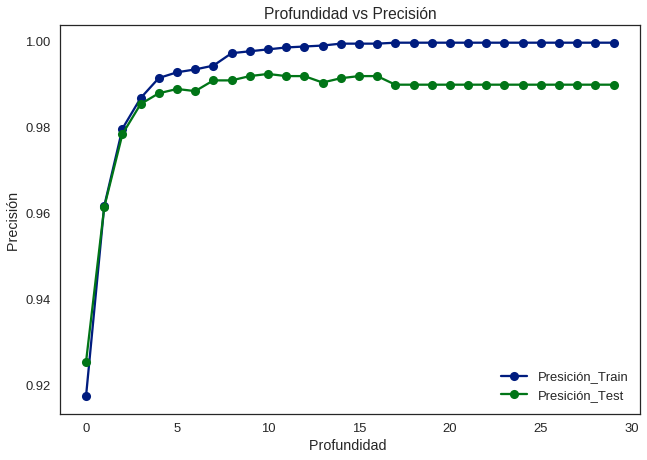

In [15]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
ac_total= pd.concat([ac_train,ac_test], axis=1)
ax = ac_total.plot(marker='o')
ax.set(xlabel='Profundidad ',
       ylabel='Precisión ',
       title='Profundidad vs Precisión');

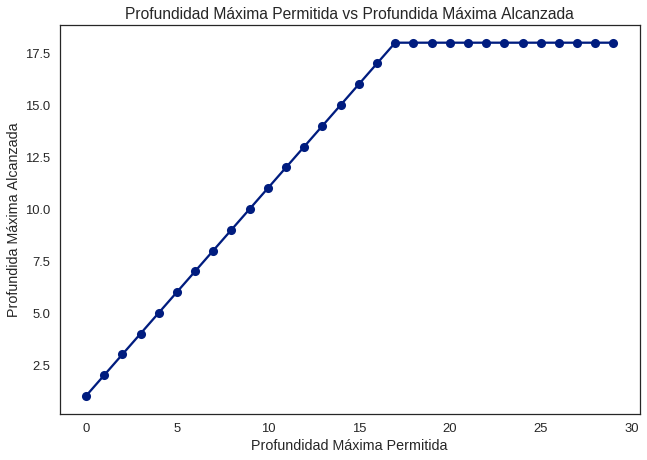

In [16]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
ax = m_d.plot(legend = False,marker='o')
ax.set(ylabel='Profundida Máxima Alcanzada',
      xlabel='Profundidad Máxima Permitida',
      title='Profundidad Máxima Permitida vs Profundida Máxima Alcanzada');


## Grid para la optimización de parametros

* Ajustando el modelo con grid para mejorar la presicion y eliminando el overfiting.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

AttributeError: ignored

* Número de nodos y máxima produndidad.

In [18]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(97, 9)

* Calculando el Error.

In [0]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([errorfunc(y_train, y_train_pred_gr, 'train'),
                                 errorfunc(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [20]:
train_test_gr_error

,train,test
exactitud,0.997332,0.991000
f1,0.994555,0.981557
precisión,0.999088,0.989669
recall,0.990063,0.973577


Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


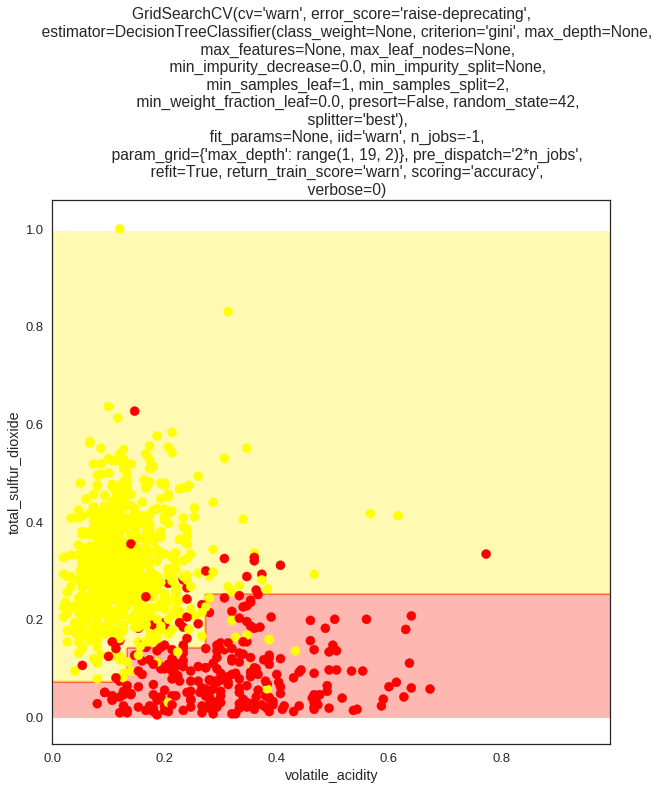

In [21]:
feature_cols = [x for x in data.columns if x not in 'color']
X = data.loc[:, feature_cols]
y = data.loc[:, 'color']
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X= X[fields]
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
X= pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])

def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(1000, random_state=42)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))
    
plot_decision_boundary(GR, X, y)

# Desicion Trees como Regresor

* Re-separamos los datos, generamos nuestro modelo y lo entrenamos.

In [22]:
feature_cols = [x for x in data.columns if x != 'residual_sugar']

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


* El número de Nodos y la Profundida Máxima

In [0]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(6371, 23)

* Cálculo de Error cuadrático medio

In [0]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train
MSE,0.000773


* Graficamos el Error

In [0]:
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

% matplotlib inline

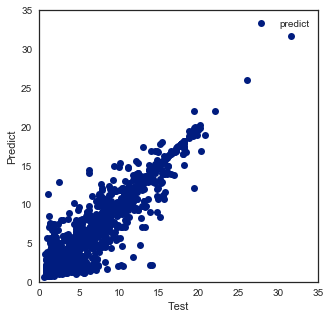

In [0]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

# KNN


## KNN como Clasificador

* Debido a que usaremos un clasificador necesitamos re-definir la data.

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

* Usando una cantidad de vecinos aleatoria para ver el rendimiento del modelo.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_test=knn.predict(X_test)

* Calculamos el Error

In [25]:
train_test_knn_error= pd.Series({'train': accuracy_score(y_train, y_pred),
                                         'test':  accuracy_score(y_test, y_pred_test)},
                                          name='Exactitud').to_frame().T
train_test_knn_error

,test,train
Exactitud,0.941,0.940182


* Observemos el comportamiento de la cantidad de vecinos con respecto de la precisión.

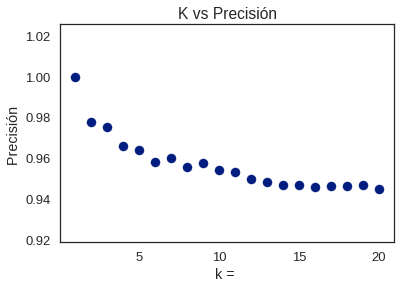

In [26]:
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsClassifier(n_neighbors=k1,p=1)
    knnp = knnp.fit(X_train, y_train)
    y_predp = knnp.predict(X_train)
    acc=accuracy_score(y_train,y_predp)
    ac=np.insert(ac,k,acc)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='Precisión ',
       title='K vs Precisión');

* Observamos que el mejor perfomance se logra con K=1, pero esto podria ser una casualidad encontrar el mejor k usaremos "cross_val_score".

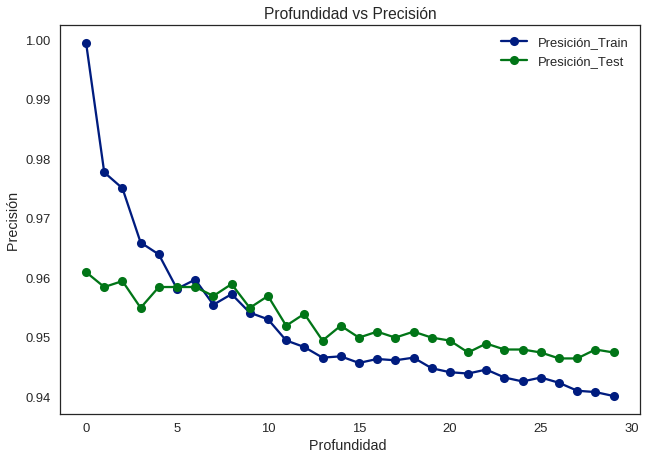

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
ac_train=np.array([])
n_c=np.array([])
m_d=np.array([])
ac_test=np.array([])
for k in range(30):
    k1=k+1
    dt =  KNeighborsClassifier(k1,p=1)
    dt = dt.fit(X_train, y_train)
    
    
 
    
    y_pred=dt.predict(X_train)
    y_pred_test=dt.predict(X_test)
    
    ac_tr=accuracy_score(y_train, y_pred)
    ac_ts=accuracy_score(y_test,y_pred_test)
    ac_train=np.insert(ac_train,k,ac_tr)
    ac_test=np.insert(ac_test,k,ac_ts)
%matplotlib inline


def gengraf(vc, i, label):
    k=np.array(range(i))
    k=k+1
    vc=pd.DataFrame(vc,columns=[label])
    k=pd.DataFrame(k,columns=['K'])
    return vc
  
ac_train=gengraf(ac_train,30,'Presición_Train')
ac_test=gengraf(ac_test,30,'Presición_Test')
n_c=gengraf(n_c,30,'Número de Nodos')
m_d=gengraf(m_d,30,'Profundida Máxima')

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')
ac_total= pd.concat([ac_train,ac_test], axis=1)
ax = ac_total.plot(marker='o')
ax.set(xlabel='Profundidad ',
       ylabel='Precisión ',
       title='Profundidad vs Precisión');

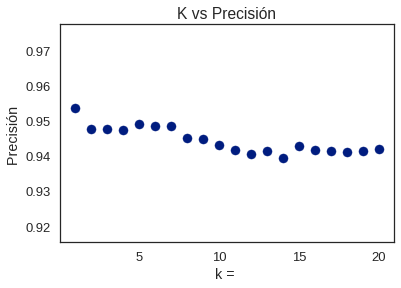

In [28]:
from sklearn.model_selection import cross_val_score
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsClassifier(n_neighbors=k1,p=1)
    cross_val= cross_val_score(knnp, X_train, y_train, cv=20)
    cross_val_mean=np.mean(cross_val)
    ac=np.insert(ac,k,cross_val_mean)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='Precisión ',
       title='K vs Precisión');

## KNN como Regresión

* Debido a que usaremos una Regresión necesitamos re-definir la data.

In [0]:
feature_cols = [x for x in data.columns if x not in 'alcohol']
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'alcohol']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'alcohol']

* Usando una cantidad de vecinos aleatoria para ver el rendimiento del modelo.

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=10)
knr = knr.fit(X_train, y_train)
y_pred = knr.predict(X_train)
y_pred_test=knr.predict(X_test)

* Calculamos el Error

In [31]:

train_test_knr_error = pd.Series({'train': mean_squared_error(y_train, y_pred),
                                         'test':  mean_squared_error(y_test, y_pred_test)},
                                          name='MSE').to_frame().T
train_test_knr_error

NameError: ignored

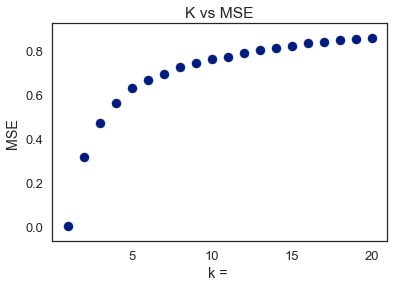

In [0]:
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsRegressor(n_neighbors=k1,p=1)
    knnp = knnp.fit(X_train, y_train)
    y_predp = knnp.predict(X_train)
    acc=mean_squared_error(y_train,y_predp)
    ac=np.insert(ac,k,acc)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='MSE ',
       title='K vs MSE');

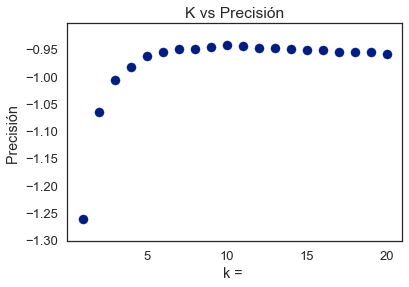

In [0]:
ac=np.array([]) 
for k in range(20):
    k1=k+1
    knnp = KNeighborsRegressor(n_neighbors=k1,p=1)
    cross_val= cross_val_score(knnp, X_train, y_train, cv=20,scoring='neg_mean_squared_error')
    cross_val_mean=np.mean(cross_val)
    ac=np.insert(ac,k,cross_val_mean)
%matplotlib inline
k=np.array(range(20))
k=k+1
ac=pd.DataFrame(ac,columns=['Accuracy'])
k=pd.DataFrame(k,columns=['K'])

ax = plt.axes()

ax.scatter(k.K,ac.Accuracy)

# Label the axes
ax.set(xlabel='k = ',
       ylabel='Precisión ',
       title='K vs Precisión');

## ENSAMBLE VOTING CLASSIFIER

*Voting es una de las formas más simples de combinar las predicciones de múltiples algoritmos de aprendizaje *automático.

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

*Usaremos KNN y Decision Tree Y SVM

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_test=knn.predict(X_test)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
from sklearn import svm
clf=svm.SVC(kernel='linear',gamma=.1, probability=True)
clf.fit(X_train, y_train)
y_predi = clf.predict(X_test)


#Calculando el accuracy de SVM

In [0]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predi))

Accuracy: 0.9905


#Calculando el accuracy de KNN

In [0]:
train_test_knn_error= pd.Series({'train': accuracy_score(y_train, y_pred),
                                         'test':  accuracy_score(y_test, y_pred_test)},
                                          name='Exactitud').to_frame().T
train_test_knn_error

,train,test
Exactitud,0.940182,0.941


#Calculando el accuracy de Decision Tree

In [0]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

full_error = pd.concat([errorfunc(y_train, y_train_pred, 'train'),
                              errorfunc(y_test, y_test_pred, 'test')],
                              axis=1)

full_error

,train,test
exactitud,0.999778,0.990000
precisión,0.999097,0.977733
recall,1.000000,0.981707
f1,0.999549,0.979716


## Usando Ensamble Learning 

## VotingClassifier

In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
m=VotingClassifier(
estimators=[('KNeighborsClassifier',knn),('DecisionTreeClassifier',dt),('SVM',clf)],voting='soft',weights=[1,1,1])

In [0]:
m=m.fit(X_train,y_train)

In [0]:
m.score(X_test,y_test)

C:\Phy\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.993

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


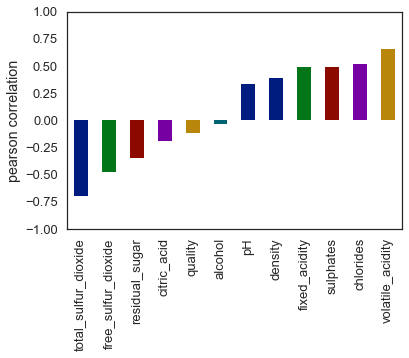

In [0]:
feature_cols = [x for x in data.columns if x not in 'color']
X = data.loc[:, feature_cols]
y = data.loc[:, 'color']
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');
X.head()
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X= pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
X.head()
Data_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

train_idx, test_idx = next(Data_split.split(data[feature_cols], data['color']))
X_train = data.loc[train_idx, fields]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train= pd.DataFrame(X_train, columns=['%s_scaled' % fld for fld in fields])
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, fields]
y_test = data.loc[test_idx, 'color']

## GradientBoostingClassifier 

*Importando la libreria desde sklearn

C:\Phy\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


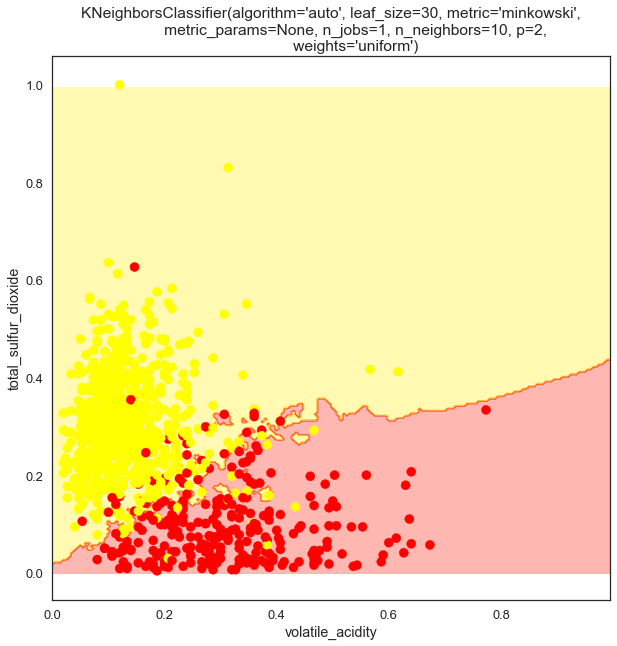

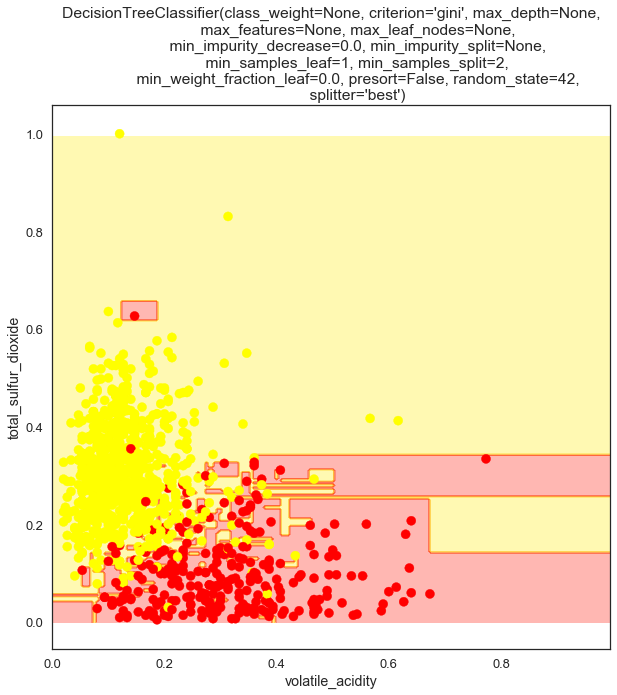

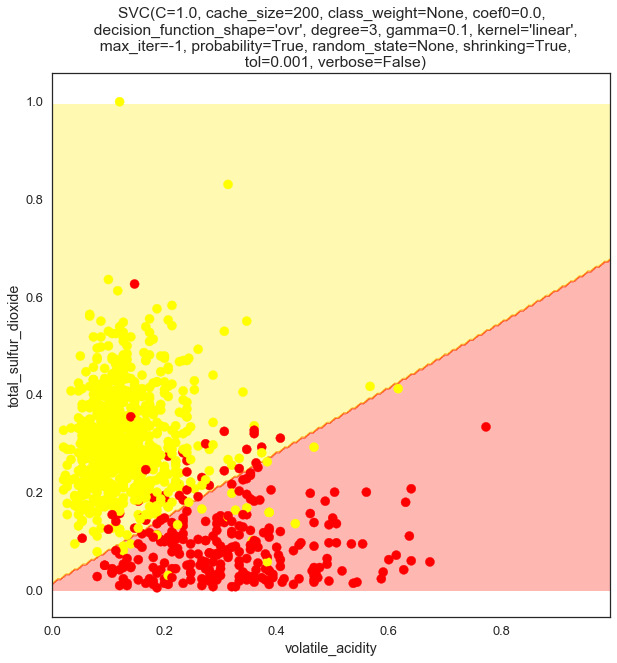

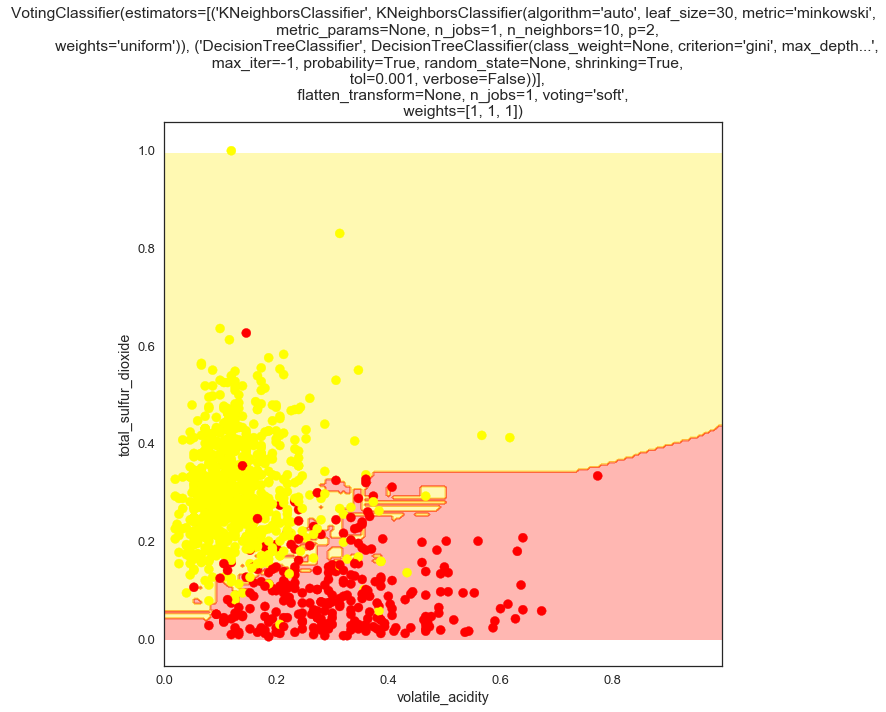

In [0]:


def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(1000, random_state=42)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))
    
    
plot_decision_boundary(knn, X, y)
plot_decision_boundary(dt, X, y)
plot_decision_boundary(clf, X, y)
plot_decision_boundary(m, X, y)



## 

C:\Phy\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Phy\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Phy\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Phy\lib\site-packages\ipykernel_la

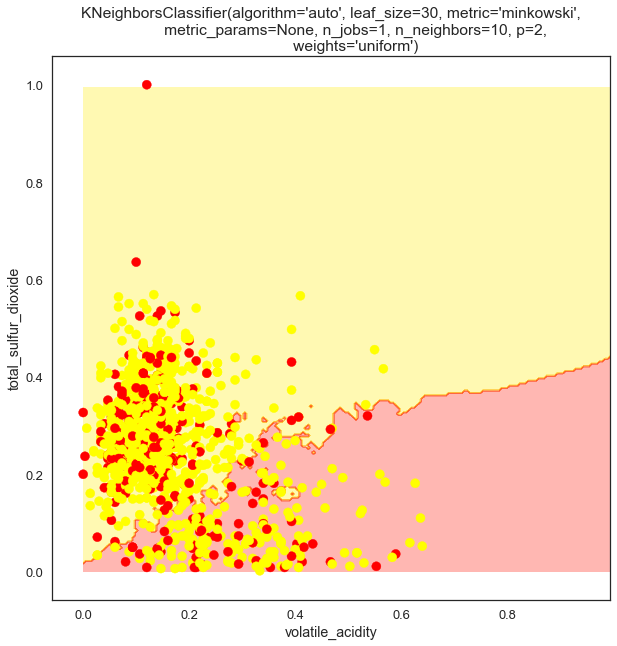

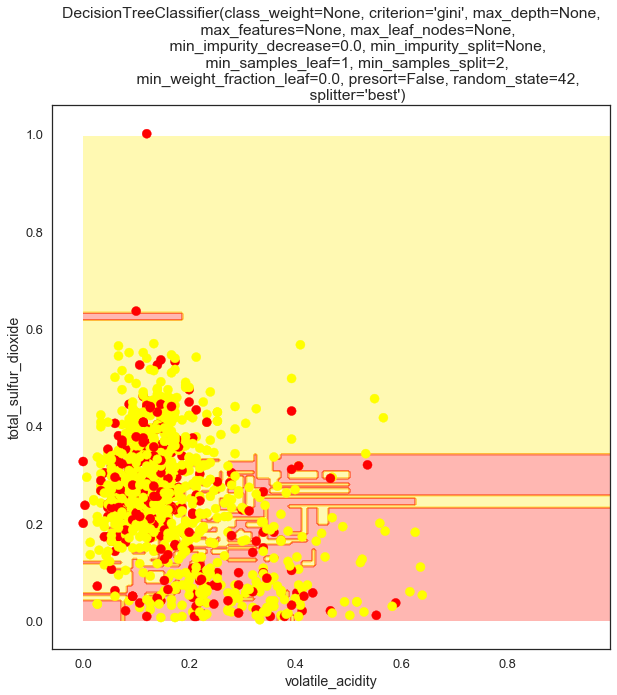

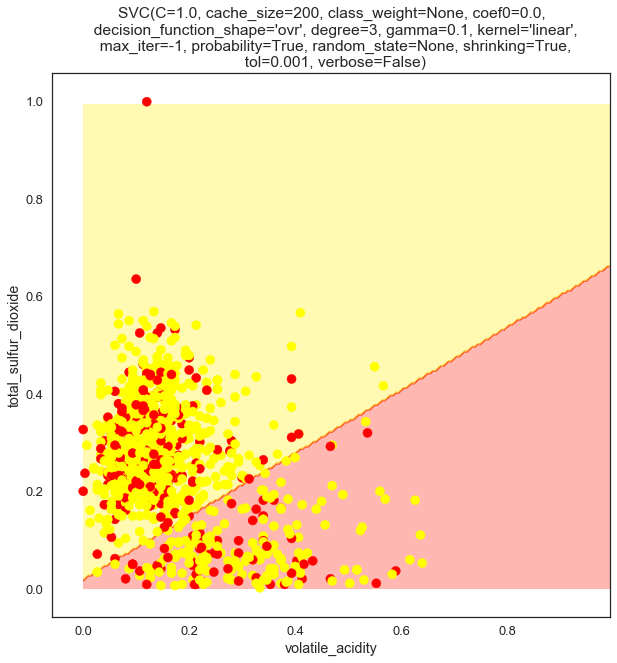

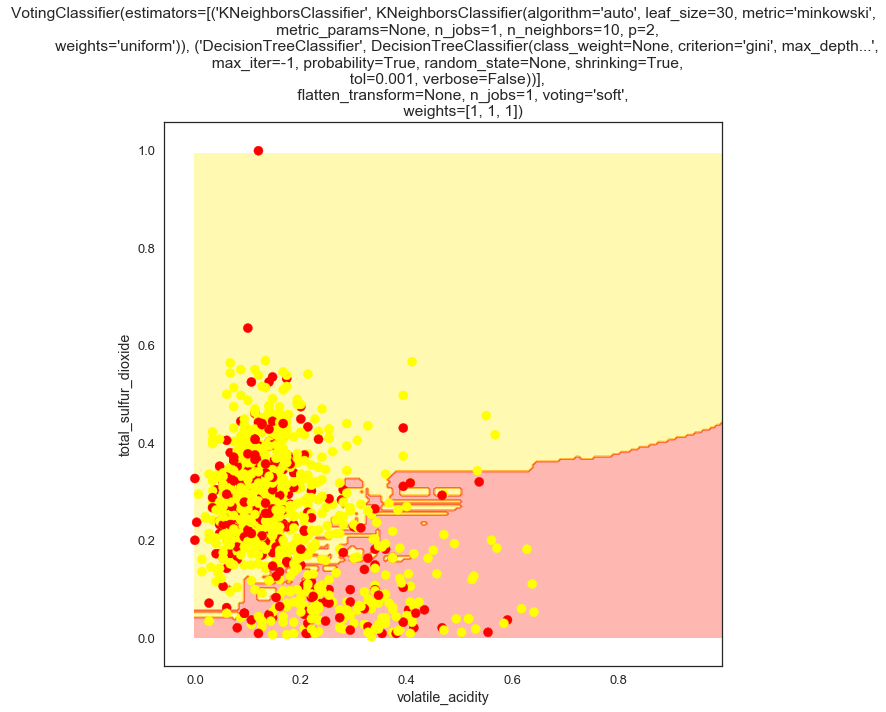

In [0]:
   
plot_decision_boundary(knn, X_train, y_train)
plot_decision_boundary(dt, X_train, y_train)
plot_decision_boundary(clf, X_train, y_train)
plot_decision_boundary(m, X_train, y_train)

In [0]:
## GradientBoostingClassifier

In [0]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 60
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results.mean())

0.9549999999999998


##  GradientBoostingClassifier modificado

In [0]:
feature_cols = [x for x in data.columns if x != 'color']

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=60,
 learning_rate = learning_rate, max_features=2, max_depth = 2, random_state =7)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.985
Accuracy score (validation): 0.980

Learning rate:  0.1
Accuracy score (training): 0.992
Accuracy score (validation): 0.988

Learning rate:  0.25
Accuracy score (training): 0.997
Accuracy score (validation): 0.995

Learning rate:  0.5
Accuracy score (training): 0.997
Accuracy score (validation): 0.997

Learning rate:  0.75
Accuracy score (training): 0.992
Accuracy score (validation): 0.988

Learning rate:  1
Accuracy score (training): 0.985
Accuracy score (validation): 0.984



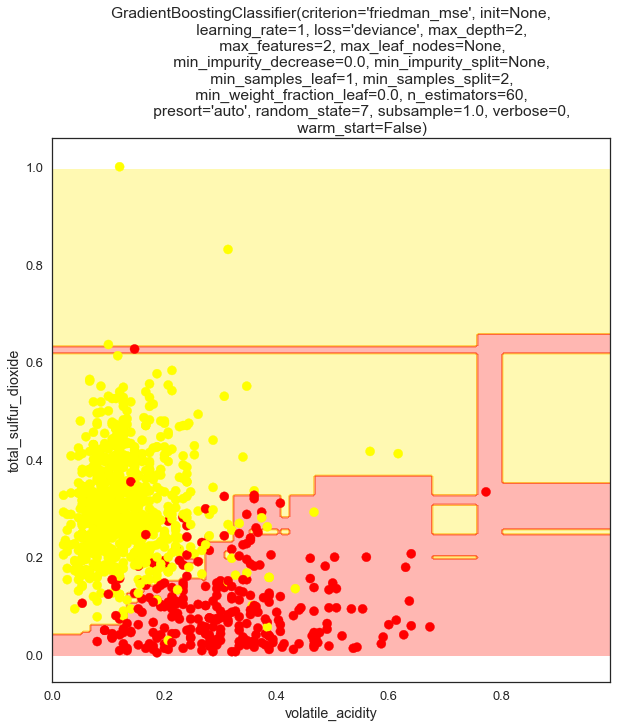

In [0]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(1000, random_state=42)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))
    
    
plot_decision_boundary(gb, X, y)

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier